In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pymcfost as mcfost
import copy
import pandas as pd
import os
import gzip
from astropy.io import fits
from matplotlib import rcParams
rcParams["figure.figsize"] = (5,2)

/home/jhyl3/.conda/envs/pyspedas/lib/python3.12/site-packages/pymcfost/SED.py:10: UserWarning: mpl_scatter_density is not present
  warnings.warn("mpl_scatter_density is not present", UserWarning)


### Distribution testing

In [3]:
r_in = 1 # disc inner radius in au
r_out = 300 # disc outer radius in au
P = 100 # number of R intervals

eps = 1e-4 # minimum height above midplane considered in H
N = 70 # number of z intervals

a_min = 0.03 / 1e4 # minimum grain size in cm, input in microns
a_max = 1000 / 1e4 # maximum grain size in cm, input in microns
M = 300 # number of grain sizes
print('Grain size range: [',a_min,',',a_max,'] cm')

Grain size range: [ 3e-06 , 0.1 ] cm


In [ ]:
grid_hdu = fits.open('./data_disk/grid.fits.gz')[0]
grid_hdu.data = np.reshape(np.full((N, P), 1.), (1, N, P))

In [50]:
def arr_gen(fill_val):
    return np.reshape(np.full((N, P), fill_val).astype('float64'), (1, N, P))

box_function = np.zeros((N,P))
box_function[:,int(0.3*P):int(0.6*P)] = 1
box_function = np.reshape(box_function, (1, N, P))

# phdu = fits.PrimaryHDU(np.array([arr_gen(0), arr_gen(1)]))
phdu = fits.PrimaryHDU(np.array([box_function, box_function]))
phdu.header['read_n_a'] = 0

ihdu_gs = fits.ImageHDU(np.array([0.03, 1000]))
# ihdu_na = fits.ImageHDU(np.full((2,),1).astype('float64'))


In [51]:
# hdul_new = fits.HDUList([phdu, ihdu_gs, ihdu_na])
hdul_new = fits.HDUList([phdu, ihdu_gs])
hdul_new.writeto('box_density.fits', overwrite=True)

### Gaussian distribution

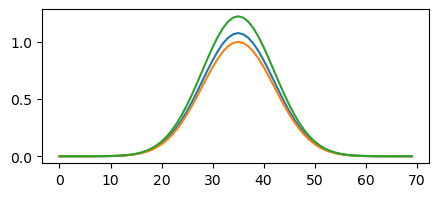

In [ ]:
mass_density = fits.open('./2_gaussian/data_disk/dust_mass_density.fits.gz')[0].data
particle_density = fits.open('./2_gaussian/data_disk/dust_particle_density.fits.gz')[0].data
input_density = fits.open('gaussian_density.fits')[0]
input_density = input_density.data[0,0]

plt.plot(mass_density[:,0]/2.5e-17)
plt.plot(input_density[:,0])
plt.plot(particle_density[0,:,0]/14)

### Box distribution

In [4]:
direc = '2_box'
mass_density = fits.open('./'+direc+'/dust_mass_density.fits.gz')[0].data
particle_density = fits.open('./'+direc+'/dust_particle_density.fits.gz')[0].data
input_density = fits.open('box_density.fits')[0]

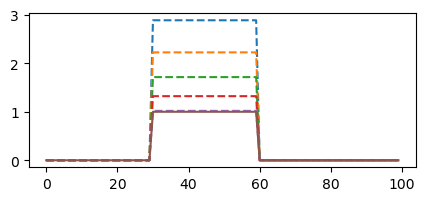

In [10]:
# plt.plot(mass_density[0]/1e-14)
for i in range(5):
    plt.plot(particle_density[i,0]/1e4, ls='--')

plt.plot(input_density.data[0,0,0])

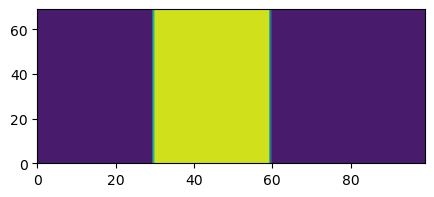

In [87]:
np.sum(particle_density,axis=0)
plt.contourf(np.sum(particle_density,axis=0))